Dataset Preview:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       11.0        1.0       11.0        5.0       11.0        1.0   
1        5.0        1.0        7.0        5.0        4.0        3.0   
2        4.0        2.0       13.0        8.0       13.0        3.0   
3        3.0        0.0       13.0       12.0       12.0        3.0   
4        9.0        0.0        6.0       11.0        3.0        4.0   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0        3.0        6.0        6.0         1.0       1  
1        9.0        1.0        6.0         5.0       0  
2        0.0        6.0        1.0         4.0       1  
3        2.0        7.0        3.0         5.0       1  
4        2.0        0.0        6.0         2.0       2  

Model Coefficients:
Intercept: 1.270683967793563
Coefficients: [ 0.03973684 -0.11416758 -0.00659641  0.03586936 -0.00247161  0.02246814
 -0.10522061 -0.01198378 -0.014166    0.00093056]

Model Evaluation:
Mean Squ

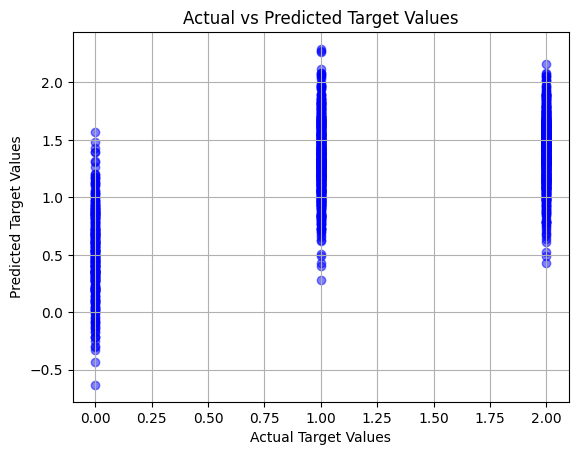

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X, Y = make_multilabel_classification(n_samples=5000, n_features=10, n_classes=2, random_state=42)
Y_continuous = Y.sum(axis=1)
data = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
data['Target'] = Y_continuous

print("Dataset Preview:")
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, Y_continuous, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Target Values")
plt.grid()
plt.show()
